In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [47]:
! pip install -U protobuf


Requirement already up-to-date: protobuf in /opt/anaconda3/lib/python3.7/site-packages (3.11.3)


In [3]:
data_raw=pd.read_csv('creditcard.csv')

In [5]:
data=data_raw.copy()

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

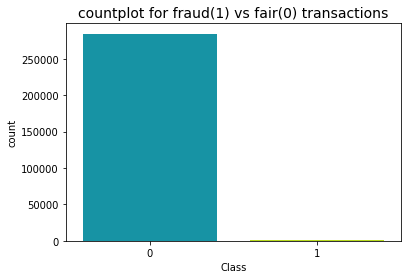

In [8]:
sns.countplot('Class', data=data, palette='nipy_spectral')
plt.title('countplot for fraud(1) vs fair(0) transactions', fontsize=14)
plt.show()

#### Determine the number of fraud and valid transactions in the dataset

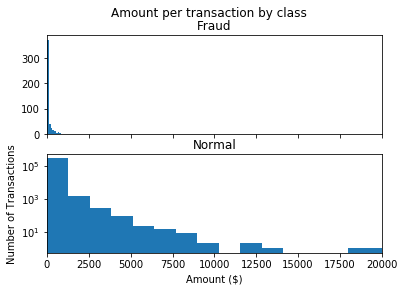

In [9]:
Fraud = data[data['Class']==1]

Normal = data[data['Class']==0]
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 20
ax1.hist(Fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(Normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [11]:
len(Fraud)

492

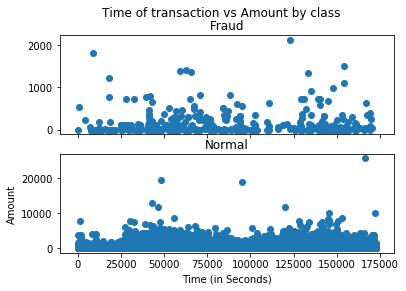

In [12]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(Fraud.Time, Fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(Normal.Time, Normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [13]:
outlier_fraction = len(Fraud)/float(len(Normal))
outlier_fraction

0.0017304750013189597

#### checking for null values

In [5]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [12]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.000,94813.860,47488.146,0.000,54201.500,84692.000,139320.500,172792.000
V1,284807.000,0.000,1.959,-56.408,-0.920,0.018,1.316,2.455
V2,284807.000,0.000,1.651,-72.716,-0.599,0.065,0.804,22.058
V3,284807.000,-0.000,1.516,-48.326,-0.890,0.180,1.027,9.383
V4,284807.000,0.000,1.416,-5.683,-0.849,-0.020,0.743,16.875
V5,284807.000,-0.000,1.380,-113.743,-0.692,-0.054,0.612,34.802
V6,284807.000,0.000,1.332,-26.161,-0.768,-0.274,0.399,73.302
V7,284807.000,-0.000,1.237,-43.557,-0.554,0.040,0.570,120.589
V8,284807.000,-0.000,1.194,-73.217,-0.209,0.022,0.327,20.007
V9,284807.000,-0.000,1.099,-13.434,-0.643,-0.051,0.597,15.595


#### -------Summary---------####
1. There are no missing value  are presented in our dataset
2. We can conclude amount of transaction is very low as average is 88 dollar.
3. Maximum transactions are not fraud as fraud case's percentage is 0.17% .The data set is highly skewed, consisting of 492 frauds in a total of 284,807 observations. This resulted in only 0.172% fraud cases. This skewed set is justified by the low number of fraudulent transactions..
4. The dataset consists of numerical values from the 28 ‘Principal Component Analysis (PCA)’ transformed features, namely V1 to V28. Furthermore, there is no metadata about the original features provided, so pre-analysis or feature study could not be done.

5. The ‘Time’ and ‘Amount’ features are not transformed data.



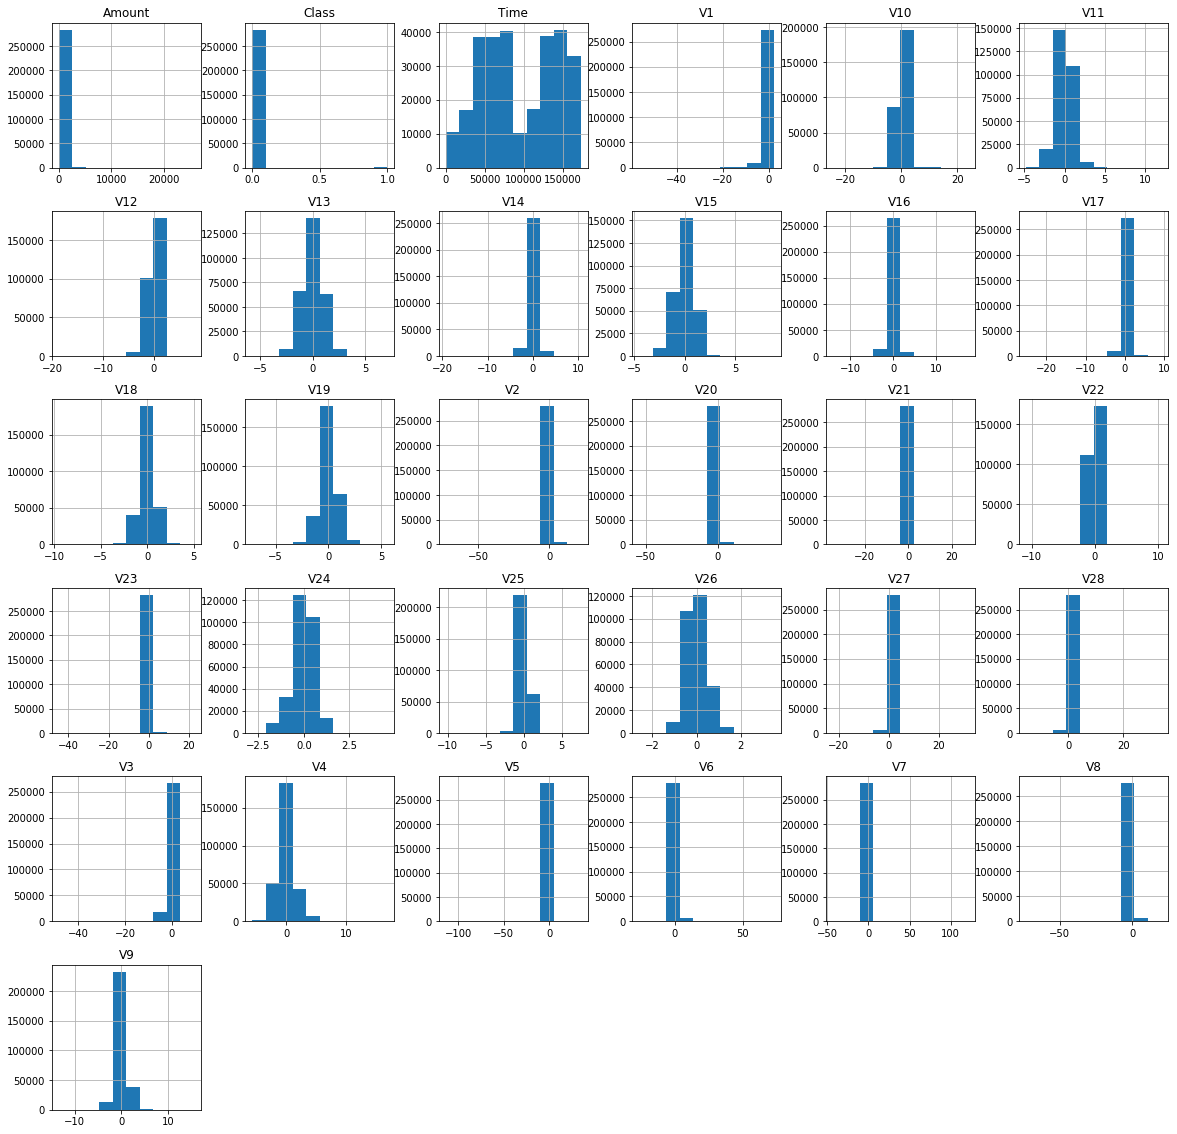

In [72]:
data.hist(figsize=(20,20))
plt.show()

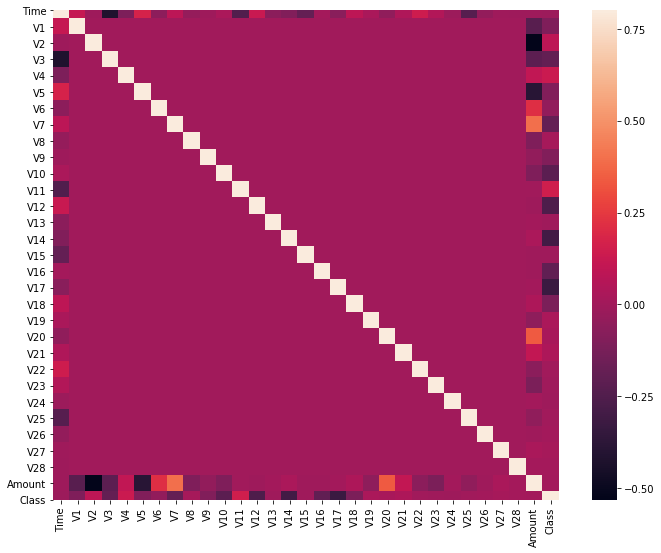

In [76]:
correlation_matrix = data.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()


#### The above correlation matrix shows that none of the V1 to V28 PCA components have any correlation to each other however if we observe Class has some form positive and negative correlations with the V components but has no correlation with Time and Amount.

(0.0, 172792.0)

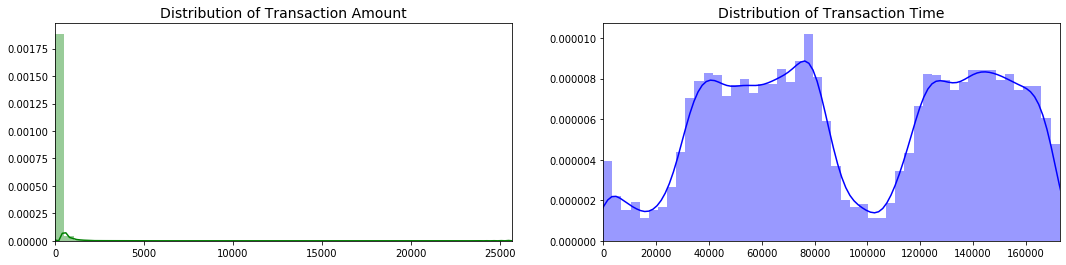

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='g')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

#### Scaling of data

In [33]:
from sklearn.preprocessing import RobustScaler

In [34]:
rs=RobustScaler()

In [37]:
data['scaled_amount'] = rs.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = rs.fit_transform(data['Time'].values.reshape(-1,1))

In [39]:
data.drop(['Amount','Time'],axis=1,inplace=True)

(-0.9949834936970594, 1.0350215580540185)

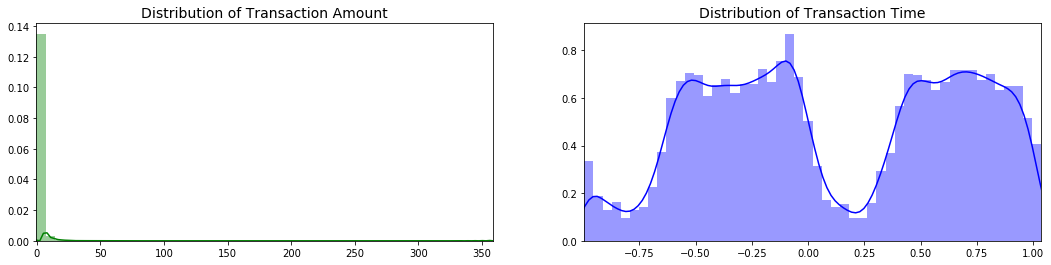

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount = data['scaled_amount'].values
time = data['scaled_time'].values

sns.distplot(amount, ax=ax[0], color='g')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount), max(amount)])

sns.distplot(time, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time), max(time)])

#### Train test split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X=data.drop(['Class'],axis=1)

In [7]:
y=data['Class']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

#### Baseline model(logistic model)

In [46]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()


In [47]:
lr.fit(X_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
pred=lr.predict(X_val)

In [51]:
pred_proba=lr.predict_proba(X_val)[::,1]

In [50]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_val, pred))
print("Precision:",metrics.precision_score(y_val, pred))
print("Recall:",metrics.recall_score(y_val, pred))

Accuracy: 0.9991222218320986
Precision: 0.8636363636363636
Recall: 0.5816326530612245


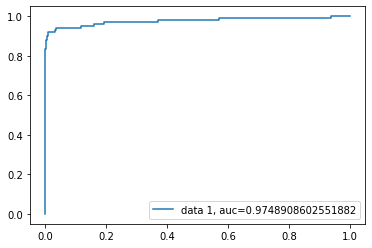

In [52]:

fpr, tpr, _ = metrics.roc_curve(y_val,  pred_proba)
auc = metrics.roc_auc_score(y_val, pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

#### Auto Encoder

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
data_new=data_raw.copy()

In [28]:
from sklearn.preprocessing import StandardScaler
data_new = data_new.drop(['Time'], axis=1)
data_new['Amount'] = StandardScaler().fit_transform(data_new['Amount'].values.reshape(-1, 1))

In [29]:
X_train, X_test = train_test_split(data_new, test_size=0.2, random_state=42)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)
y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)
X_train = X_train.values
X_test = X_test.values
X_train.shape

(227451, 29)

In [43]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Model, load_model,Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks.tensorboard_v1 import TensorBoard
from tensorflow.keras import regularizers

%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

#### Model Building

In [44]:
input_dim = X_train.shape[1]
encoding_dim = 14
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

#### Model Training

In [49]:
nb_epoch = 30
batch_size = 32
autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error', 
                    metrics=['accuracy'])


history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1).history


Train on 227451 samples, validate on 56962 samples
Epoch 1/30
227451/227451 [==============================] - 12s 53us/sample - loss: 0.7103 - accuracy: 0.7124 - val_loss: 0.7423 - val_accuracy: 0.7115
Epoch 2/30
227451/227451 [==============================] - 12s 54us/sample - loss: 0.7103 - accuracy: 0.7125 - val_loss: 0.7424 - val_accuracy: 0.7131
Epoch 3/30
227451/227451 [==============================] - 13s 57us/sample - loss: 0.7101 - accuracy: 0.7127 - val_loss: 0.7424 - val_accuracy: 0.7194
Epoch 4/30
227451/227451 [==============================] - 14s 60us/sample - loss: 0.7098 - accuracy: 0.7127 - val_loss: 0.7482 - val_accuracy: 0.7009
Epoch 5/30
227451/227451 [==============================] - 12s 53us/sample - loss: 0.7095 - accuracy: 0.7139 - val_loss: 0.7417 - val_accuracy: 0.7182
Epoch 6/30
227451/227451 [==============================] - 11s 49us/sample - loss: 0.7099 - accuracy: 0.7128 - val_loss: 0.7416 - val_accuracy: 0.7246
Epoch 7/30
227451/227451 [===========

In [50]:
autoencoder.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [51]:
autoencoder = load_model('model.h5')

####  Evaluation of model

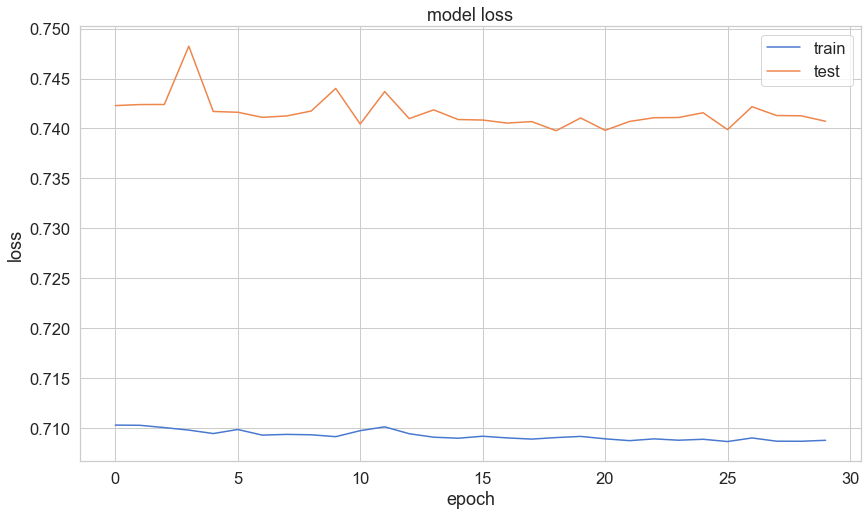

In [52]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [53]:
predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.739849,0.001720
std,3.432240,0.041443
min,0.059777,0.000000
25%,0.238895,0.000000
50%,0.386861,0.000000
75%,0.615419,0.000000
max,264.485176,1.000000


#### Reconstruction error without fraud


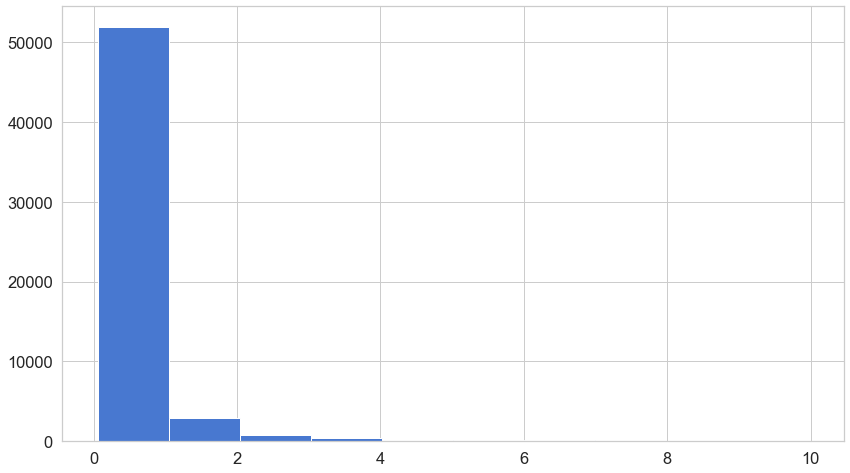

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = error_df[(error_df['true_class']== 0) & (error_df['reconstruction_error'] < 10)]
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

#### Reconstruction error with fraud

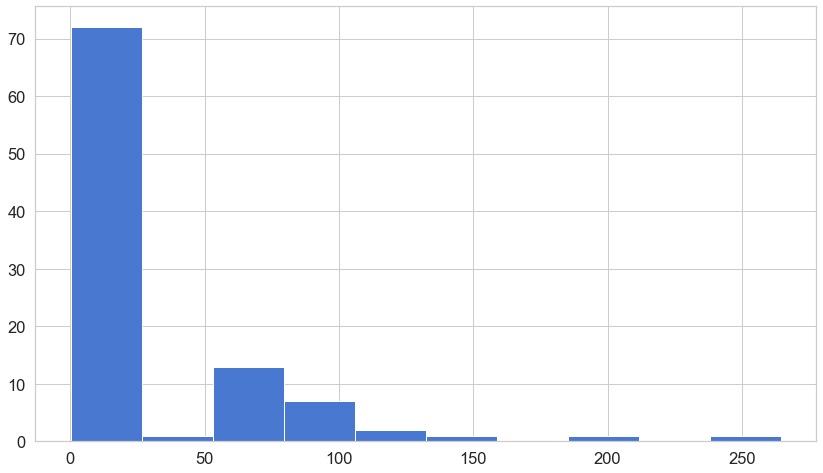

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = error_df[error_df['true_class'] == 1]
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

#### Precision vs Recall

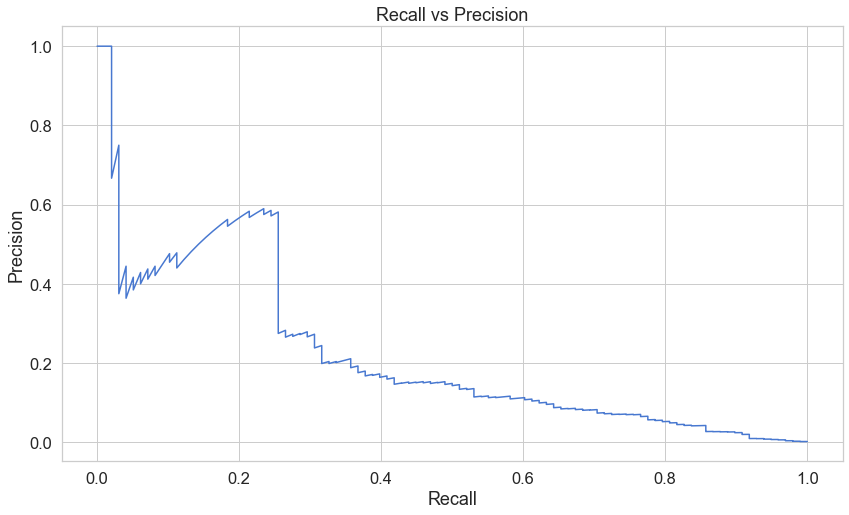

In [57]:
from sklearn.metrics import precision_recall_curve
precision, recall, th = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

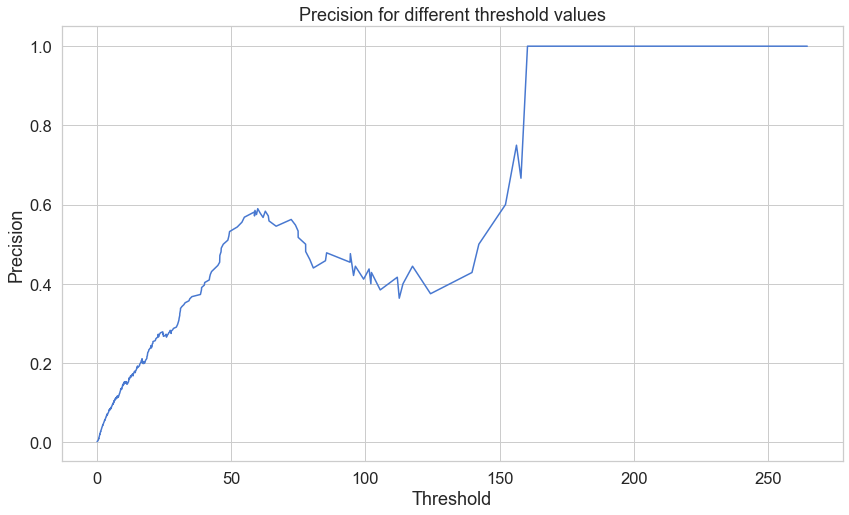

In [58]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

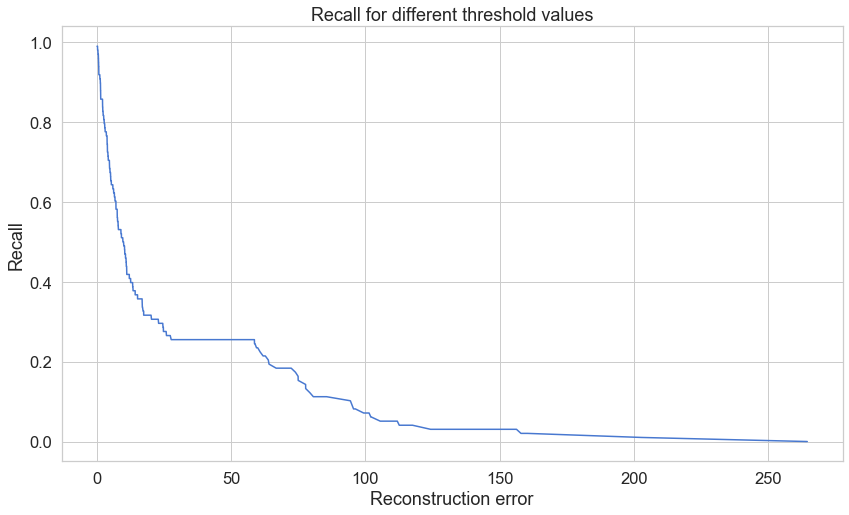

In [59]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

#### Predictions

In [60]:
threshold = 2.9

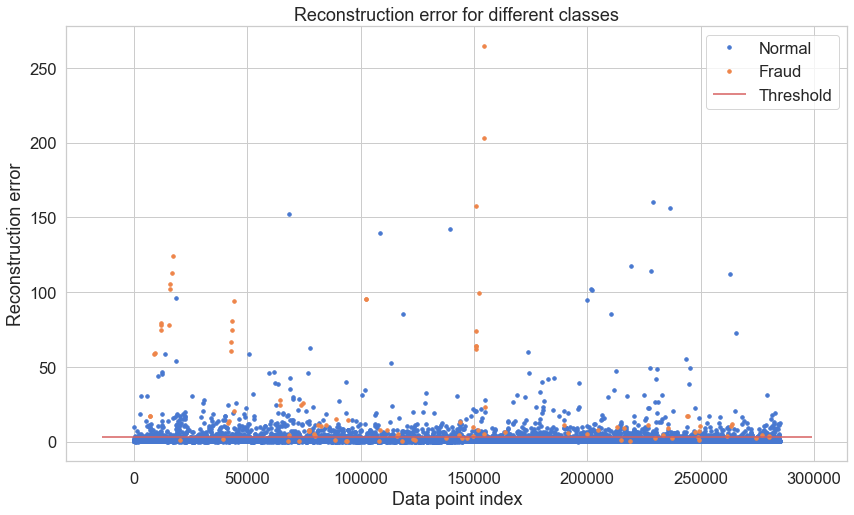

In [61]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

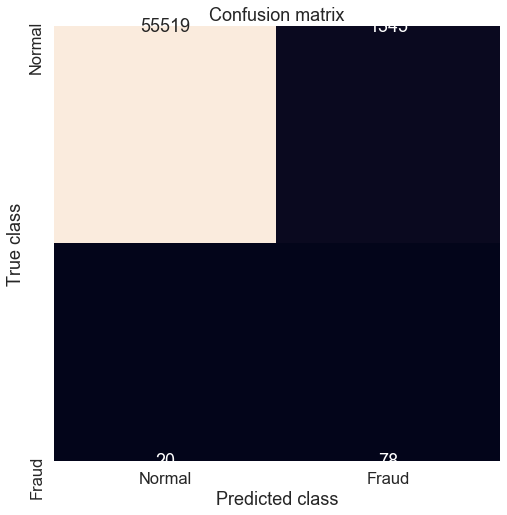

In [78]:
from sklearn.metrics import confusion_matrix
y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS,  cbar=False,annot=True,fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [72]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1,n_iter=500)

res = tsne.fit_transform(predictions )

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 56962 samples in 8.863s...
[t-SNE] Computed neighbors for 56962 samples in 154.737s...
[t-SNE] Computed conditional probabilities for sample 1000 / 56962
[t-SNE] Computed conditional probabilities for sample 2000 / 56962
[t-SNE] Computed conditional probabilities for sample 3000 / 56962
[t-SNE] Computed conditional probabilities for sample 4000 / 56962
[t-SNE] Computed conditional probabilities for sample 5000 / 56962
[t-SNE] Computed conditional probabilities for sample 6000 / 56962
[t-SNE] Computed conditional probabilities for sample 7000 / 56962
[t-SNE] Computed conditional probabilities for sample 8000 / 56962
[t-SNE] Computed conditional probabilities for sample 9000 / 56962
[t-SNE] Computed conditional probabilities for sample 10000 / 56962
[t-SNE] Computed conditional probabilities for sample 11000 / 56962
[t-SNE] Computed conditional probabilities for sample 12000 / 56962
[t-SNE] Computed conditional probabilities for s

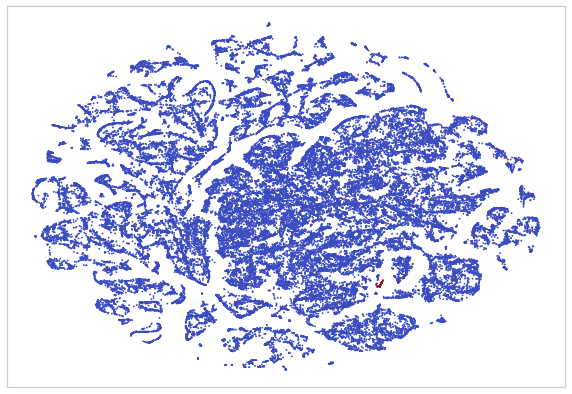

In [73]:
fig = plt.figure(figsize=(10,7))

scatter =plt.scatter(res[:,0],res[:,1],c=y_test, cmap='coolwarm', s=0.6)

scatter.axes.get_xaxis().set_visible(False)

scatter.axes.get_yaxis().set_visible(False)

#### Artificial Neural Network

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [19]:
# We are transforming data to numpy array to implementing with keras
X_train = np.array(X_train)
X_val = np.array(X_val)
y_train = np.array(y_train)
y_val = np.array(y_val)

In [20]:
model_new = Sequential([
    Dense(units=20, input_dim = X_train.shape[1], activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(units=20,activation='relu'),
    Dense(units=24,activation='relu'),
    Dense(1, activation='sigmoid')
])

In [21]:
model_new.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 20)                620       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                504       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 2,153
Trainable params: 2,153
Non-trainable params: 0
____________________________________________________

In [22]:
model_new.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_new.fit(X_train, y_train, batch_size=30, epochs=5)

Epoch 1/5
227845/227845 [==============================] - 15s 64us/step - loss: 3.9963 - accuracy: 0.9967
Epoch 2/5
227845/227845 [==============================] - 16s 68us/step - loss: 0.0476 - accuracy: 0.9981
Epoch 3/5
227845/227845 [==============================] - 11s 49us/step - loss: 0.0127 - accuracy: 0.9983
Epoch 4/5
227845/227845 [==============================] - 12s 52us/step - loss: 0.0430 - accuracy: 0.99820s - loss: 0.0437 - accuracy:  - ETA: 0s - loss: 0.0434 - accuracy: 
Epoch 5/5
227845/227845 [==============================] - 11s 50us/step - loss: 0.0336 - accuracy: 0.9983


In [23]:
score = model_new.evaluate(X_val, y_val)
print('validation Accuracy: {:.2f}%\n validation Loss: {}'.format(score[1]*100,score[0]))

56962/56962 [==============================] - 1s 15us/step
validation Accuracy: 99.83%
 validation Loss: 0.012701321955843043


#### SMOTE Sampling

In [24]:
from imblearn.over_sampling import SMOTE

In [25]:
X_smote, y_smote = SMOTE().fit_sample(X, y)

In [26]:
X_smote = pd.DataFrame(X_smote)
y_smote = pd.DataFrame(y_smote)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

In [28]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [30]:
model_new.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_new.fit(X_train, y_train, batch_size = 30, epochs = 5)

Epoch 1/5
398041/398041 [==============================] - 20s 50us/step - loss: 0.7141 - accuracy: 0.5004
Epoch 2/5
398041/398041 [==============================] - 19s 48us/step - loss: 0.6991 - accuracy: 0.4996
Epoch 3/5
398041/398041 [==============================] - 20s 51us/step - loss: 0.6975 - accuracy: 0.4995
Epoch 4/5
398041/398041 [==============================] - 23s 57us/step - loss: 0.6935 - accuracy: 0.4995
Epoch 5/5
398041/398041 [==============================] - 23s 59us/step - loss: 0.7018 - accuracy: 0.4999


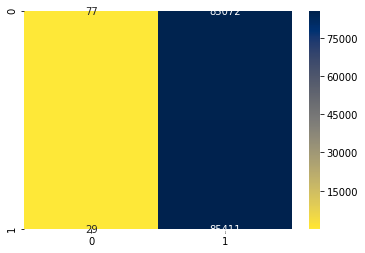

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = model_new.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot=True, fmt='.0f',cmap='cividis_r')
plt.show()

##### It is not the true result 'cause we used data with smote sampling because of that number of class 0 and class 1 are equal in here. That's why we'll use whole data we imported at the beginning.

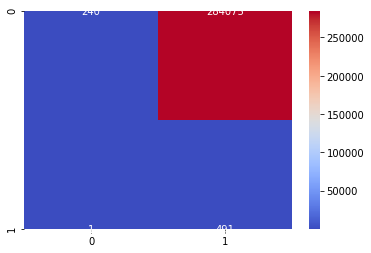

In [35]:
y_pred2 = model_new.predict(X)
y_test2 = pd.DataFrame(y)
cm2 = confusion_matrix(y_test2, y_pred2.round())
sns.heatmap(cm2, annot=True, fmt='.0f', cmap='coolwarm')
plt.show()

In [36]:
scoreNew = model_new.evaluate(X, y)
print('Test Accuracy: {:.2f}%\nTest Loss: {}'.format(scoreNew[1]*100,scoreNew[0]))

284807/284807 [==============================] - 4s 15us/step
Test Accuracy: 0.26%
Test Loss: 0.6935229769065533


In [37]:
print(classification_report(y_test2, y_pred2.round()))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00    284315
           1       0.00      1.00      0.00       492

    accuracy                           0.00    284807
   macro avg       0.50      0.50      0.00    284807
weighted avg       0.99      0.00      0.00    284807

